In [1]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np

import radical.utils     as ru
import radical.pilot     as rp
import radical.analytics as ra

from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob


In [2]:
# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
sessions = pd.read_csv('../null_continuous_fifo/2_pipelines/sessions.csv', index_col=0)
pilots = pd.read_csv('../null_continuous_fifo/2_pipelines/pilots.csv', index_col=0)
units = pd.read_csv('../null_continuous_fifo/2_pipelines/units.csv', index_col=0)

In [3]:
print 'Synapse: Weak Scaling: Total number of successful runs: %s' % sessions.shape[0]
print 'Synapse: Weak Scaling: Total number of pilots: %s' % pilots.shape[0]
print 'Synapse: Weak Scaling: Total number of units: %s\n' % units.shape[0]

Synapse: Weak Scaling: Total number of successful runs: 1
Synapse: Weak Scaling: Total number of pilots: 1
Synapse: Weak Scaling: Total number of units: 80



## Get timestamps for all units in `cu_exec_start`, `cu_exec_stop`

In [15]:
# Load only the 1 generation strong scaling using heterogeneous protocols (4 ESMACS, 4 TIES)
# rp_folder = glob.glob('../null_continuous_fifo/exp1/rp.*')
# src = rp_folder[0]
# session = ra.Session(stype='radical.pilot', src=src)
# # units = session.filter(etype='unit', uid=units[:3])
# events = session.list('event')

# # Ask Andre about this sorting function

# units  = session.filter(etype=['unit'],
#          state=[rp.DONE]).filter(uid=sorted(session.list('uid'))[:10])


# data=[]
# stop_data = []
# unit_ids = []

# for unit in units.get():
#     print unit.uid
#     unit_ids.append(unit.uid)
#     data.append(unit.timestamps(event=[{ru.EVENT: 'cu_exec_start'}]))
#     stop_data.append(unit.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}]))
# data = pd.DataFrame(data, columns = ['cu_exec_start'])
# data # show all data for 720 units
# stop_data = pd.DataFrame(stop_data, columns = ['cu_exec_stop'])
# data['cu_exec_stop'] = stop_data
# data

In [20]:
rp_folder = glob.glob('../null_continuous_fifo/2_pipelines/2p_correct_labels/rp.*')
re_folder = glob.glob('../null_continuous_fifo/2_pipelines/2p_correct_labels/re.*')
src = rp_folder[0]
session = ra.Session(stype='radical.pilot', src=src)
src = '/Users/JumanaDakka/git/htbac-escience-18/null_continuous_fifo/2_pipelines/2p_correct_labels/'
# enTK_session = ra.Session(stype='radical.entk', src=src, sid='re.session.two.jdakka.017731.0000')

events = session.list('event')
# units  = session.filter(etype=['unit'],
#          state=[rp.DONE]).filter(uid=sorted(session.list('uid')))

units = session.filter(etype='unit', uid=['unit.000000','unit.000009',
                                       'unit.000010','unit.000019',
                                       'unit.000020','unit.000029',
                                       'unit.000030','unit.000039',
                                       'unit.000040','unit.000049',
                                       'unit.000050','unit.000059',
                                       'unit.000060','unit.000069',
                                       'unit.000070','unit.000079'], inplace=True)

cu_start_data=[]
cu_stop_data = []
AGENT_SCHEDULING_data = []
FAILED_data = []

units_ids = ['unit.000000','unit.000009',
               'unit.000010','unit.000019',
               'unit.000020','unit.000029',
               'unit.000030','unit.000039',
               'unit.000040','unit.000049',
               'unit.000050','unit.000059',
               'unit.000060','unit.000069',
               'unit.000070','unit.000079']

# events
cu_start_data = units.timestamps(event = [{ru.EVENT: 'cu_exec_start'}])
cu_stop_data = units.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}])
cu_start_data = pd.DataFrame(cu_start_data, columns = ['cu_exec_start'], index = units_ids)
cu_stop_data = pd.DataFrame(cu_stop_data, columns = ['cu_exec_stop'], index = units_ids)

# states

Duplicates_AGENT_SCHEDULING_data = units.timestamps(event = [{ru.STATE: rp.AGENT_SCHEDULING}])
AGENT_SCHEDULING_data = [Duplicates_AGENT_SCHEDULING_data[i] for i in range(len(Duplicates_AGENT_SCHEDULING_data)) if i%2==0]
AGENT_SCHEDULING_data = pd.DataFrame(AGENT_SCHEDULING_data, columns = ['AGENT_SCHEDULING'], index = units_ids)

Duplicates_DONE_data = units.timestamps(event = [{ru.STATE: rp.DONE}])
DONE_data = set()
DONE_data = [x for x in Duplicates_DONE_data if x not in DONE_data and (DONE_data.add(x) or True)]
DONE_data = pd.DataFrame(DONE_data, columns = ['DONE'], index = units_ids)

df = pd.concat([cu_start_data, cu_stop_data, AGENT_SCHEDULING_data, DONE_data],  axis=1)
df



# for unit in units.get():
#     print unit.uid
#     unit_ids.append(unit.uid)
#     data.append(unit.timestamps(event=[{ru.EVENT: 'cu_exec_start'}]))
#     stop_data.append(unit.timestamps(event = [{ru.EVENT: 'cu_exec_stop'}]))
# data = pd.DataFrame(data, columns = ['cu_exec_start'])
# data # show all data for 720 units
# stop_data = pd.DataFrame(stop_data, columns = ['cu_exec_stop'])
# data['cu_exec_stop'] = stop_data
# data



,cu_exec_start,cu_exec_stop,AGENT_SCHEDULING,DONE
unit.000000,1698.6435,1701.6706,1698.5561,1703.3439
unit.000009,1699.1287,1702.4913,1698.5561,1703.3443
unit.000010,1699.1901,1702.5114,1698.5561,1705.7751
unit.000019,1699.7078,1702.8884,1698.5561,1705.7753
unit.000020,1705.8553,1709.0658,1705.7712,1712.2799
unit.000029,1706.2392,1709.4878,1705.7712,1712.2802
unit.000030,1708.9923,1712.1595,1708.9014,1714.9757
unit.000039,1709.4413,1712.5993,1708.9014,1714.9759
unit.000040,1715.2358,1718.5946,1715.0989,1721.2932
unit.000049,1715.6589,1718.7363,1715.0989,1721.2935


### Each subplot presents the data for an EnTK stage (1-4). 


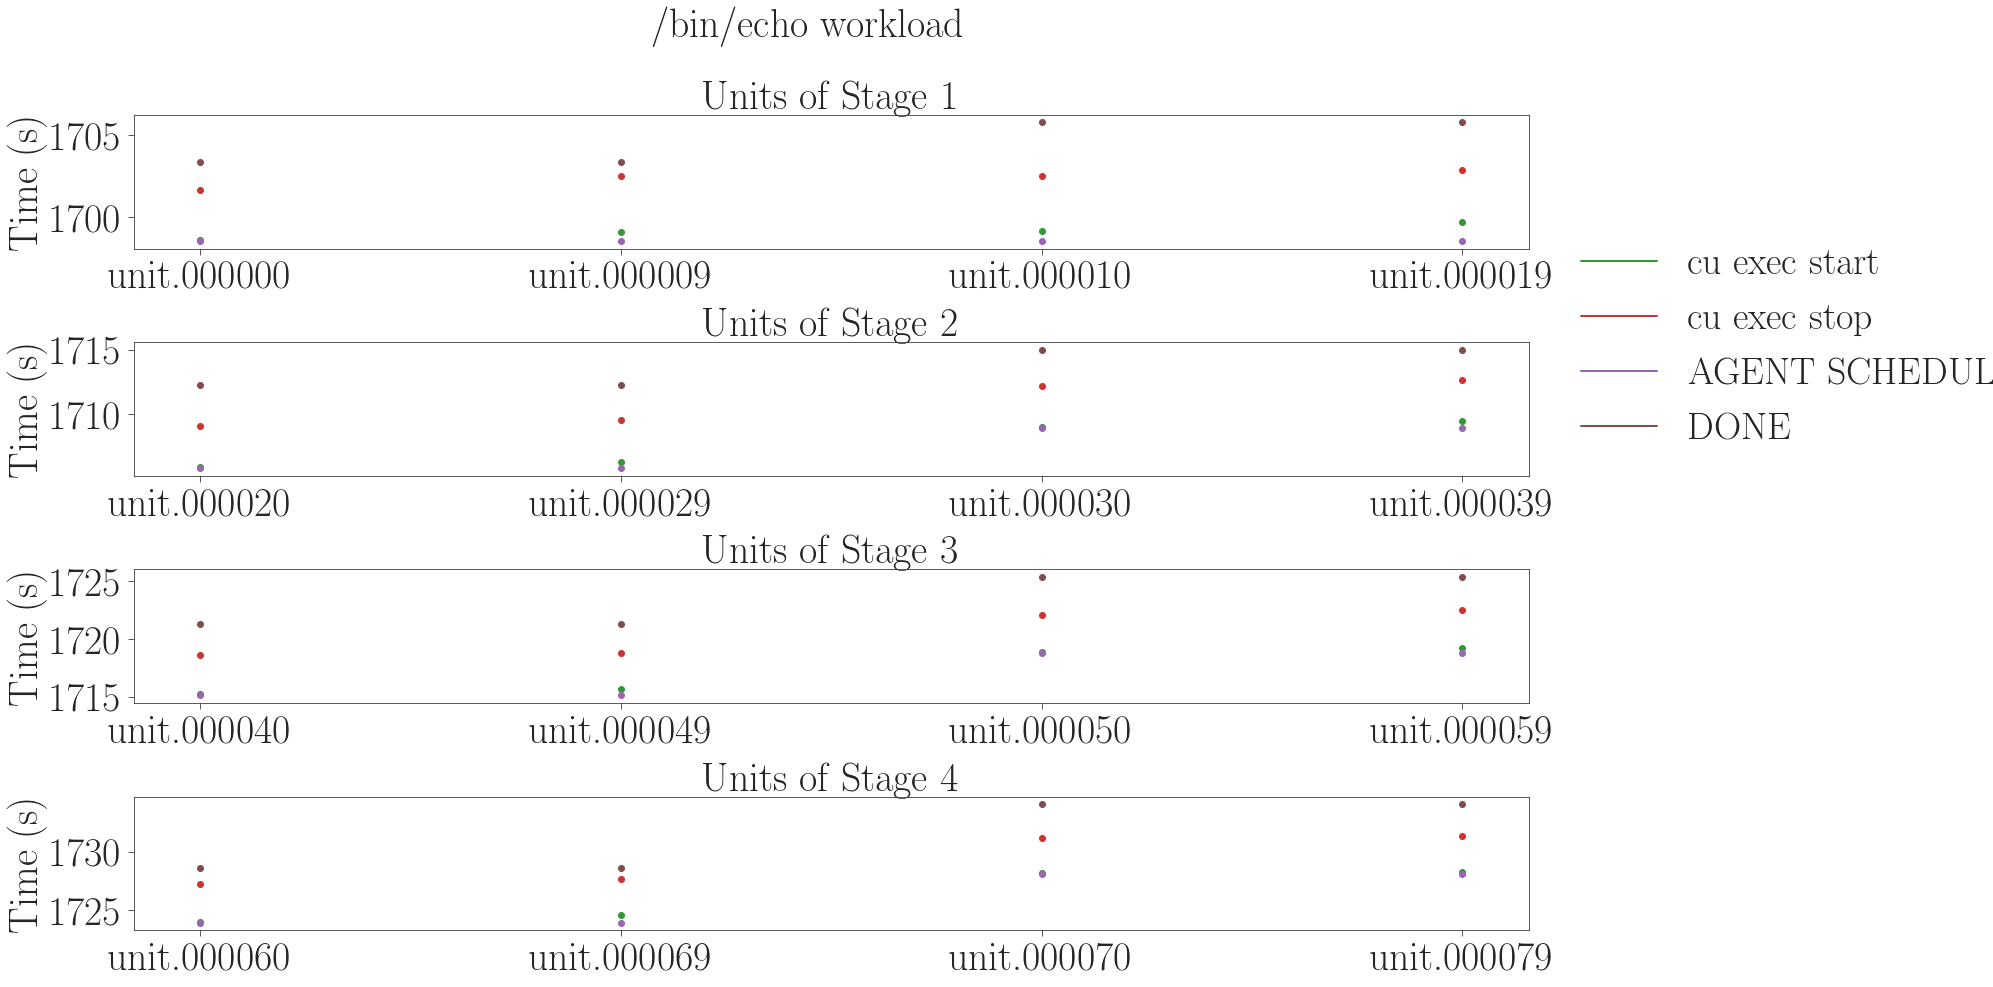

In [34]:
# nunits = concurrent units 
nunits = [1,2,3,4]
fwidth = 32
fhight = 10

fig, axarr = plt.subplots(4, figsize=(25,15))
fig.suptitle('/bin/echo workload')
axarr[0].scatter(df.iloc[0:4]['cu_exec_start'].index, df.iloc[0:4]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[0].scatter(df.iloc[0:4]['cu_exec_start'].index, df.iloc[0:4]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[0].scatter(df.iloc[0:4]['AGENT_SCHEDULING'].index, df.iloc[0:4]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[0].scatter(df.iloc[0:4]['DONE'].index, df.iloc[0:4]['DONE'],  marker='o', color=tableau20[10])
axarr[0].set_ylabel('Time (s)')
axarr[0].set_title('Units of Stage 1')


axarr[1].scatter(df.iloc[4:8]['cu_exec_start'].index, df.iloc[4:8]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[1].scatter(df.iloc[4:8]['cu_exec_start'].index, df.iloc[4:8]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[1].scatter(df.iloc[4:8]['AGENT_SCHEDULING'].index, df.iloc[4:8]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[1].scatter(df.iloc[4:8]['DONE'].index, df.iloc[4:8]['DONE'],  marker='o', color=tableau20[10])
axarr[1].set_title('Units of Stage 2')
axarr[1].set_ylabel('Time (s)')

axarr[2].scatter(df.iloc[8:12]['cu_exec_start'].index, df.iloc[8:12]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[2].scatter(df.iloc[8:12]['cu_exec_start'].index, df.iloc[8:12]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[2].scatter(df.iloc[8:12]['AGENT_SCHEDULING'].index, df.iloc[8:12]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[2].scatter(df.iloc[8:12]['DONE'].index, df.iloc[8:12]['DONE'],  marker='o', color=tableau20[10])
axarr[2].set_title('Units of Stage 3')
axarr[2].set_ylabel('Time (s)')

axarr[3].scatter(df.iloc[12:16]['cu_exec_start'].index, df.iloc[12:16]['cu_exec_start'],  marker='o', color=tableau20[4])
axarr[3].scatter(df.iloc[12:16]['cu_exec_start'].index, df.iloc[12:16]['cu_exec_stop'],  marker='o', color=tableau20[6])
axarr[3].scatter(df.iloc[12:16]['AGENT_SCHEDULING'].index, df.iloc[12:16]['AGENT_SCHEDULING'],  marker='o', color=tableau20[8])
axarr[3].scatter(df.iloc[12:16]['DONE'].index, df.iloc[12:16]['DONE'],  marker='o', color=tableau20[10])
axarr[3].set_title('Units of Stage 4')
axarr[3].set_ylabel('Time (s)')

fig.subplots_adjust(hspace=0.7)
fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[4]),
                mpl.lines.Line2D([], [], color=tableau20[6]),
                mpl.lines.Line2D([], [], color=tableau20[8]),
                mpl.lines.Line2D([], [], color=tableau20[10])
           ),
           (
                'cu exec start',
                'cu exec stop',
                'AGENT SCHEDULING',
                'DONE'
           ),
            bbox_to_anchor=(.87, .7), loc=2, borderaxespad=0.)


# fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig('bin_echo_heterogeneous_protocols_CUs.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('bin_echo_heterogeneous_protocols_CUs.png', dpi=300, bbox_inches='tight')
